In [1]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")
#sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

#import forces as fc
import molecules as mc
import img3dto2d as i32
import util
import forces as fc
import molecules as mc
#import random
#import copy
from tqdm import tqdm
import scipy

In [2]:
# get box size relation to average molecule diameter
radius = 100
s_vol = (4/3)*np.pi*radius**3

print(np.cbrt(s_vol*1000*(1/0.13)))

3182.1092474458783


In [3]:
#setup universe
# Parameters for universe initialization
#box_const_size = 3800.
#box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
#num_molecules = 1000#1000#20
#other setup
#seed = 1414 #1313

#combs = grid_points(box_size, radius, spacing)
#molecules = [mc.Molecule(pos, radius) for pos in combs]

#force_func = custom_force1
#uni = mc.SimpleUniverse(box_size, len(molecules),np.repeat(radius,len(molecules)),seed, own_molecules = molecules, force_fun = cust_force)
#uni = mc.SimpleUniverse(box_size, num_molecules,radii,seed, force_fun = force_func)

In [3]:
def sphere_vol(radius):
  return (4/3)*np.pi*radius**3

In [4]:
def avg_sphere_vol(d):
  return util.pdf(d) * sphere_vol(d/2)

In [12]:
num_molecules = 1000
avg_sphere_area = scipy.integrate.quad(avg_sphere_vol, -0.0000000000001, np.infty)[0]
exp_box_area = num_molecules*avg_sphere_area*(1/0.06)


print("num molecules",(11500*11500*1000)/(avg_sphere_area*(1/0.06)))
exp_box_dim = np.cbrt(exp_box_area)

num molecules 989.1308959246044


In [9]:
print(exp_box_area)
print(exp_box_dim,round(exp_box_dim))

133703234369.57997
5113.449498078122 5113


In [8]:
print(sphere_vol(200))

33510321.638291124


In [9]:
box_const_size = float(round(exp_box_dim))
box_size = np.array([box_const_size,box_const_size,box_const_size])
box_area = box_size[0] * box_size[1] * box_size[2]

In [10]:
vol_frac = []
seed = 1414
for i in tqdm(range(100)):
  #get 1000 radii from dist
  radii  = util.get_n_radii(num_molecules, seed = seed) 
  # get their volume fraction
  sphere_area = sum([sphere_vol(r) for r in radii])
  # print(sphere_area)
  # print(box_area)
  vol_frac.append(sphere_area/box_area)
  seed +=1

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:56<00:00,  1.17s/it]


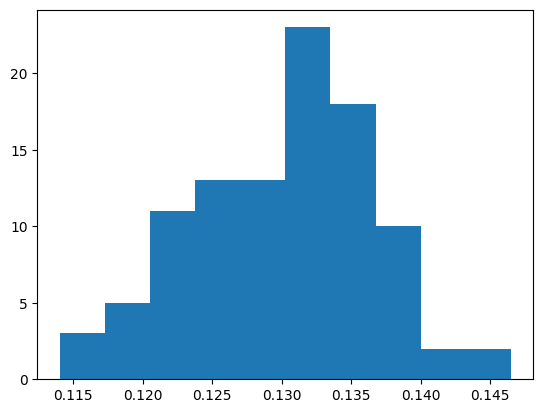

In [11]:
# plot stats
plt.figure()
plt.hist(vol_frac, bins = 10)
hist, edges = np.histogram(vol_frac, bins = 100, density = True)
bin_centers = (edges[:-1] + edges[1:]) / 2
# plt.plot(bin_centers, hist)
plt.show()

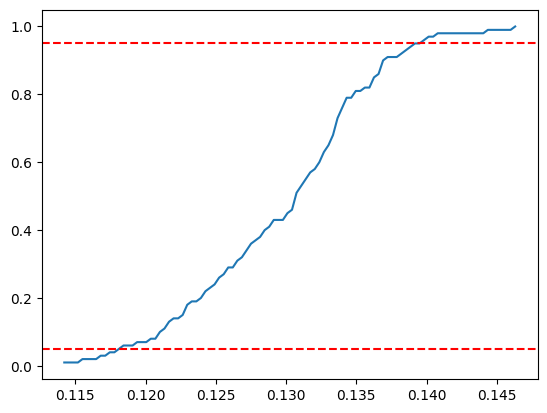

In [12]:
hist_norm = hist/sum(hist)
cum_hist = np.cumsum(hist_norm)

plt.figure()
plt.plot(bin_centers, cum_hist)
plt.axhline(y=0.05, color='r', linestyle='dashed')
plt.axhline(y=0.95, color='r', linestyle='dashed')
plt.show()


In [13]:
print(bin_centers[2], bin_centers[-3])

0.11485385488164342 0.1456637071265997


In [19]:
seed = 1423
uni = mc.SimpleUniverse(box_size, num_molecules,util.get_n_radii(num_molecules,seed=seed),seed = seed, force_fun = fc.total_force_molecule)

Unable to spawn points withing the box


In [21]:
#test if we can create universe with this box size
seed = 1414

box_vol = box_const_size**3

for i in range(10):
  radii = util.get_n_radii(num_molecules,seed=seed)
  sphere_vol = 0
  for r in radii:
    sphere_vol += ((4/3)*r**3*np.pi)

  uni = mc.SimpleUniverse(box_size, num_molecules,radii,seed = seed, force_fun = fc.total_force_molecule)
  print(seed, sphere_vol/box_vol)
  seed +=1

1414 0.11555470981407082
Unable to spawn points withing the box
1415 0.13279279622358278
1416 0.1372703633007189
1417 0.12583421724897037
Unable to spawn points withing the box
1418 0.13506714751080337
Unable to spawn points withing the box
1419 0.13369555667957275
1420 0.12274183857815174
1421 0.12901427565818496
1422 0.12294508051455749
Unable to spawn points withing the box
1423 0.12418428513037937


: 